# Problem Statement

In agriculture, choosing the right crop to grow based on the environmental and soil conditions is a complex decision for farmers. Various factors such as soil nutrient levels, temperature, rainfall, and pH influence crop yields. Many farmers struggle to make data-driven decisions due to the unavailability of proper tools or expert knowledge. Incorrect crop choices can lead to suboptimal yields, financial losses, and soil degradation.

# Objective

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\Prathamesh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading the Dataset

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

## Displaying the DataFrame


In [3]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Getting the Shape of the DataFrame

In [4]:
crop.shape

(2200, 8)

## Exploratory Data Analysis (EDA)

### Summary of a DataFrame's columns, including data types and non-null values. 

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Checking for Missing Values in the Dataset

In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Identifying Duplicate Records in the Dataset

In [7]:
crop.duplicated().sum()

0

### Statistical Summary of the Dataset

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Outlier Detection and Treatment Using IQR Method

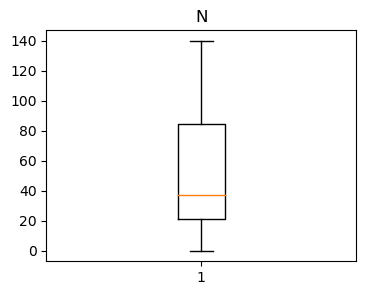

for column N
IQR----- 63.25
Upper Whisker--- 179.125
Lower Whisker--- -73.875


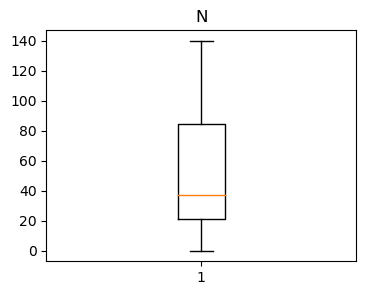

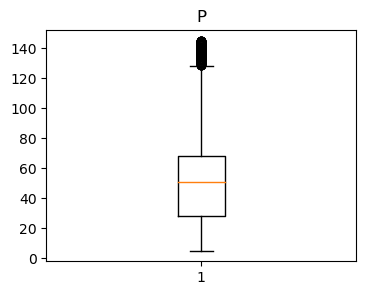

for column P
IQR----- 40.0
Upper Whisker--- 128.0
Lower Whisker--- -32.0


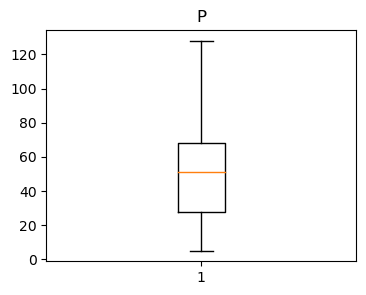

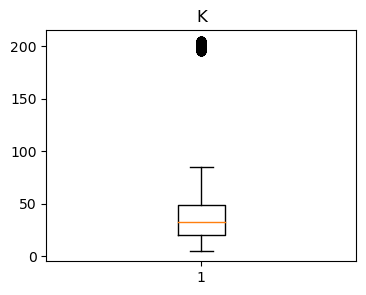

for column K
IQR----- 29.0
Upper Whisker--- 92.5
Lower Whisker--- -23.5


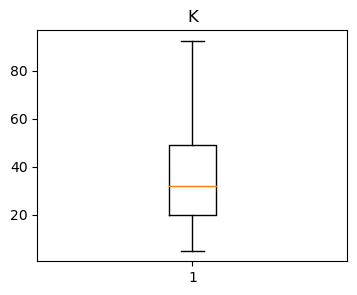

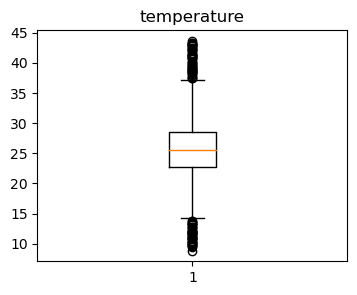

for column temperature
IQR----- 5.792279300000001
Upper Whisker--- 37.2500728825
Lower Whisker--- 14.080955682499999


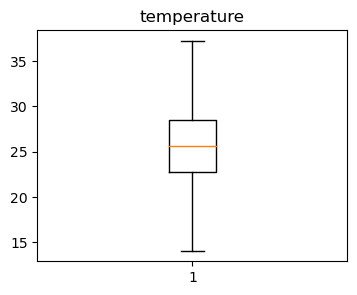

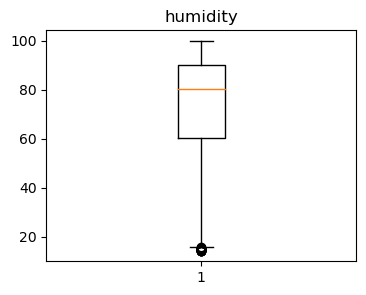

for column humidity
IQR----- 29.6868179525
Upper Whisker--- 134.47899768374998
Lower Whisker--- 15.731725873750001


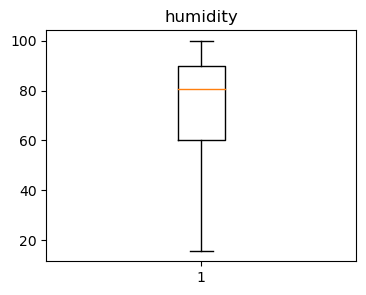

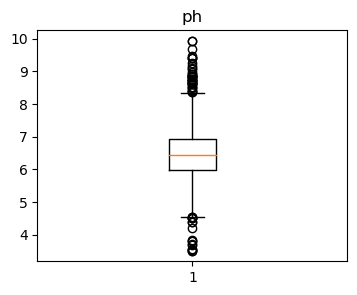

for column ph
IQR----- 0.9519498220000013
Upper Whisker--- 8.351567354250005
Lower Whisker--- 4.543768066249998


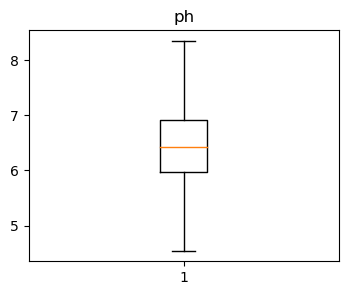

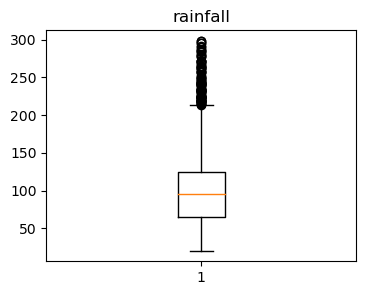

for column rainfall
IQR----- 59.715821800000015
Upper Whisker--- 213.84124050000003
Lower Whisker--- -25.022046700000033


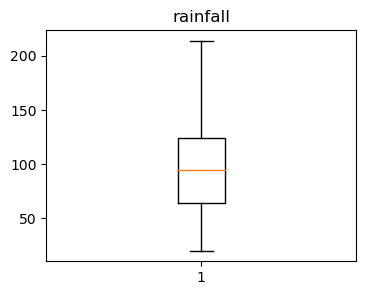

In [9]:
for  i in crop.describe().columns:
    plt.figure(figsize=(4,3))
    plt.boxplot(crop[i])     #Create boxplots for visualizing outliers.
    plt.title(i)
    plt.show()

    
    q1=crop[i].quantile(0.25)
    q3=crop[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    print("for column" ,i) 
    print("IQR-----",iqr)
    print("Upper Whisker---",upper)
    print("Lower Whisker---",lower)
    
    crop.loc[crop[i]<lower,i]=lower
    crop.loc[crop[i]>upper,i]=upper
    
    plt.figure(figsize=(4,3))
    plt.boxplot(crop[i])
    plt.title(i)
    plt.show()

### Calculate skewness of each numeric feature in the dataset

In [10]:
skewness = crop.drop('label', axis=1).skew()  # Exclude the 'label' column as it's categorical
print(skewness) #range of skewness is -2 to 2

N              0.509721
P              0.836609
K              1.116640
temperature    0.070778
humidity      -1.087575
ph             0.146471
rainfall       0.663507
dtype: float64


### Visualizing a bar plot of skewness for each feature

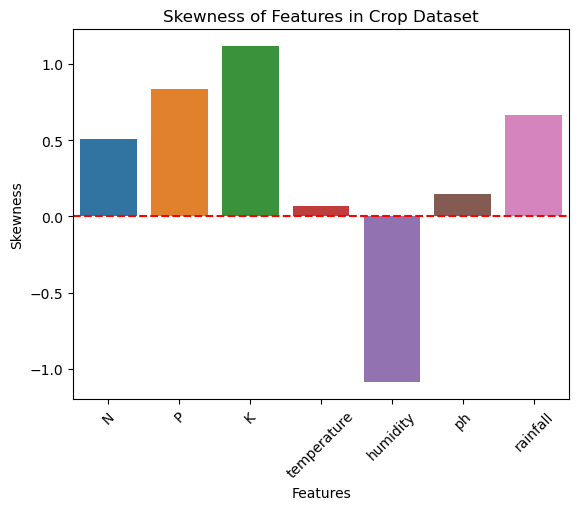

In [11]:
sns.barplot(x=skewness.index, y=skewness.values)
plt.axhline(0, color='red', linestyle='--')  # Line at y=0 for reference
plt.title('Skewness of Features in Crop Dataset')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

### Correlation Matrix to Analyze Feature Relationships

In [12]:
corr=crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.227834,0.019000,0.023850,0.190746,0.106321,0.044041
P,-0.227834,1.000000,0.561850,-0.132569,-0.138850,-0.140243,-0.063986
K,0.019000,0.561850,1.000000,-0.164312,0.120765,-0.107937,-0.026358
temperature,0.023850,-0.132569,-0.164312,1.000000,0.212362,-0.020906,-0.041047
humidity,0.190746,-0.138850,0.120765,0.212362,1.000000,0.000323,0.085163
ph,0.106321,-0.140243,-0.107937,-0.020906,0.000323,1.000000,-0.119116
rainfall,0.044041,-0.063986,-0.026358,-0.041047,0.085163,-0.119116,1.000000


### Visualizing Correlation Matrix with Heatmap

<Axes: >

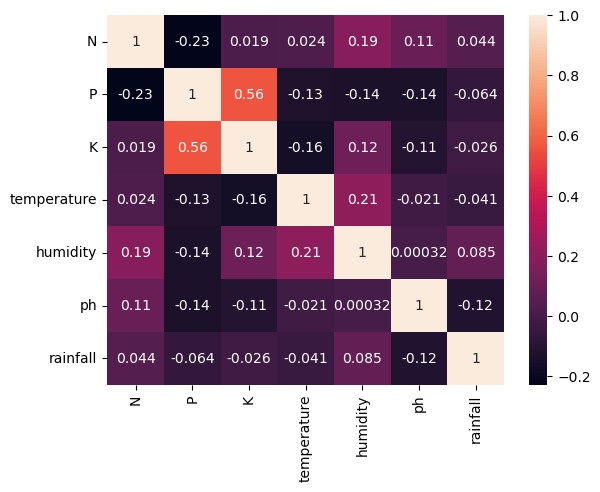

In [13]:
sns.heatmap(corr, annot=True, cbar= True)

### Distribution of Crop Labels in the Dataset

In [14]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Identifying Unique Crop Labels in the Dataset

In [15]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Identifying Unique Crop Labels size in the Dataset

In [16]:
crop['label'].unique().size

22

### Visualizing the Distribution of Nitrogen (N) Levels

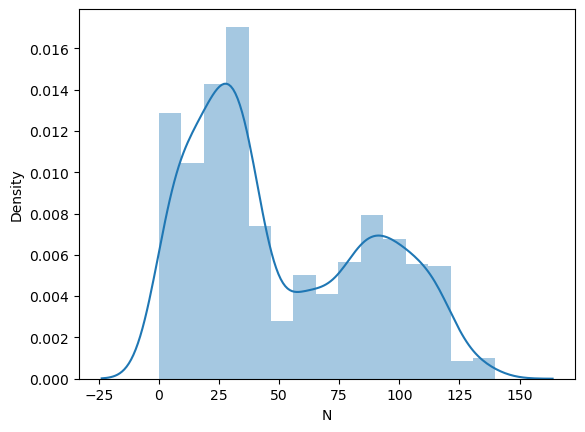

In [17]:
sns.distplot(crop['N'])
plt.show()

### Visualizing the Distribution of Phosphorus (P) Levels

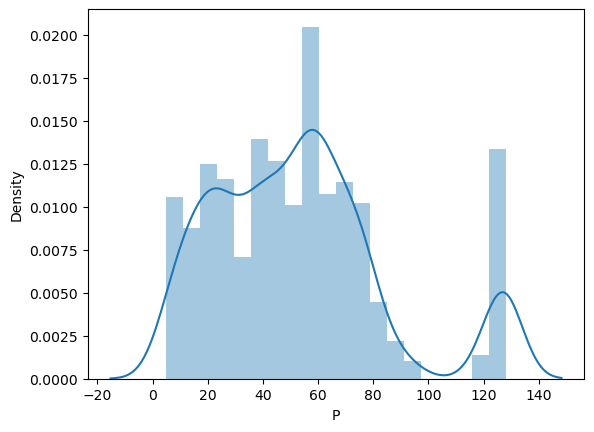

In [18]:
sns.distplot(crop['P'])
plt.show()

### Visualizing the Distribution of Potassium (K) Levels

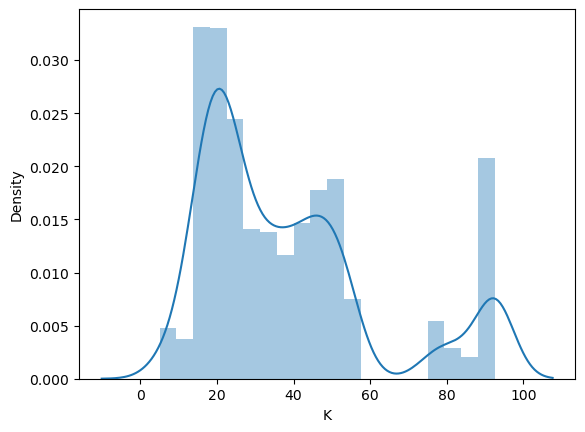

In [19]:
sns.distplot(crop['K'])
plt.show()

### Identifying Unique Crop Labels in the Dataset

In [20]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Encoding Categorical Labels for Crop Classification Using a Dictionary

In [21]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee':22
}

crop['label'] = crop['label'].map(crop_dict)

### Displaying the Updated DataFrame

In [22]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,1
1,85.0,58,41.0,21.770462,80.319644,7.038096,213.841241,1
2,60.0,55,44.0,23.004459,82.320763,7.840207,213.841241,1
3,74.0,35,40.0,26.491096,80.158363,6.980401,213.841241,1
4,78.0,42,42.0,20.130175,81.604873,7.628473,213.841241,1


### Checking Unique Crop Labels Again

In [23]:
crop['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

### Value Distribution of  Crop Labels Again

In [24]:
crop['label'].value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

### Separating Features and Target Variable

In [25]:
X = crop.drop('label', axis=1)
y = crop['label']

### Splitting the Data into Training and Testing Part

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(1760, 7)

In [28]:
X_test.shape

(440, 7)

### Feature Scaling: Enhancing Model Performance with Min-Max Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

### Display Scaled Training Data

In [30]:
X_train

array([[0.12142857, 0.08943089, 0.10285714, ..., 0.90741433, 0.54671227,
        0.42683288],
       [0.26428571, 0.60162602, 0.16      , ..., 0.63639219, 0.68285498,
        0.25350661],
       [0.05      , 0.55284553, 0.22857143, ..., 0.56261534, 0.720702  ,
        0.12842796],
       ...,
       [0.07857143, 0.25203252, 0.29714286, ..., 0.42786788, 0.50729598,
        0.41295249],
       [0.07857143, 0.96747967, 1.        , ..., 0.76361423, 0.47727648,
        0.26380037],
       [0.22857143, 0.59349593, 0.19428571, ..., 0.55339782, 0.64690107,
        0.17081269]])

## Model Selection

### Importing Machine Learning Models and Evaluation Metrics

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

### Create the Object For Each Model Using Dictionary

In [32]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

### Model Fit and Accuracy Evaluation

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score}")

LogisticRegression mode with accuracy: 0.9272727272727272
GaussianNB mode with accuracy: 0.9954545454545455
SVC mode with accuracy: 0.975
KNeighborsClassifier mode with accuracy: 0.9727272727272728
DecisionTreeClassifier mode with accuracy: 0.9840909090909091
ExtraTreeClassifier mode with accuracy: 0.9136363636363637
RandomForestClassifier mode with accuracy: 0.9931818181818182
BaggingClassifier mode with accuracy: 0.990909090909091
GradientBoostingClassifier mode with accuracy: 0.9818181818181818
AdaBoostClassifier mode with accuracy: 0.1409090909090909


### Model Fitting and Prediction with Random Forest Classifier and Evaluating Accuracy

In [34]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

### Display Column Names

In [35]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## Define a Crop Recommendation Function

In [36]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.transform(features)  # Assuming mx is a scaler/transformer
    prediction = randclf.predict(mx_features).reshape(1, -1)
    return prediction[0][0]  # Extract scalar value from the ndarray

### 1. Smart Crop Recommendation: Identifying the Best Crop for Optimal Yield

In [37]:
# New inputs
N = 40
P = 30
K = 50  # Changed from lowercase 'k' to uppercase 'K' for consistency
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
             8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
             14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
             19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

# Check if the prediction is a valid crop index
if predict in crop_dict:
    crop = crop_dict[predict]
    print(f"{crop} is the best crop to be cultivated.")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")


Mango is the best crop to be cultivated.


### 2. Smart Crop Recommendation: Identifying the Best Crop for Optimal Yield

In [38]:
# new inputs 2
N = 100
P = 90
k = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Grapes is a best crop to be cultivated 


### 3. Smart Crop Recommendation: Identifying the Best Crop for Optimal Yield

In [39]:
# new inputs 3
N = 10
P = 60
k = 70
temperature = 30.0
humidity = 50.0
ph = 2.5
rainfall = 500.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Mango is a best crop to be cultivated 


### 4. Smart Crop Recommendation: Identifying the Best Crop for Optimal Yield

In [40]:
# new inputs 4
N = 100
P = 20
k = 20
temperature = 30.0
humidity = 45.0
ph = 3.5
rainfall = 120.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Coffee is a best crop to be cultivated 


### 5. Smart Crop Recommendation: Identifying the Best Crop for Optimal Yield

In [41]:
# new inputs 5
N = 20
P = 20
k = 20
temperature = 20
humidity = 20
ph = 3.5
rainfall = 120.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Cotton is a best crop to be cultivated 


### Saving the Best Model Using Pickle

In [42]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))